# Line (Polynomial) of Best Fit

This demo shows how the multi-dimensional projection formula we used in class can be used to fit a line to a set of points.

To see the effect of each of the parameters in the cell below, go ahead and change them as you'd like and see what happens to the output.

To run this notebook, click `Runtime > Run All` directly above.

### Overfitting / Cross-Validation Motivation
Set the parameters as shown below for a nifty looking output

```python
# target polynomial we use to build our scatter points
# m = [1, 2, 3] implies b = 1 + 2a + 3a^2
m = [1, 2, 3]

# number of points to sample (from range -3 to 3)
num_pts = 11

# order of polynomial we estimate with
poly_order = 10

```

Behavior like this happens everytime `num_pts = poly_order + 1`.

Almost seems like *too good* a fit, right?

# Building sample data to estimate

In [ ]:
# m is the target polynomial we use to build our scatter points
# m = [1, 2, 3] implies b = 1 + 2a + 3a^2
# note that you can make polynoimals of higher or lower
# order by making this list longer or shorter
# (m = [1, 2, 3, 4, 5, 6] is also a valid input)
m = [1, 2, 3, 4]

# number of points to sample (from range -3 to 3)
num_pts = 100

# order of polynomial we estimate with
poly_order = 3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# this command makes graphs looks a bit nicer
# (you could skip importing seaborn above and this line if you prefer)
sns.set(font_scale=2)

# build an a, b from target polynomial
a = np.linspace(-3, 3, num_pts)
b = sum(coef * a ** order for order, coef in enumerate(m))

# add a bit of random 'noise'
rng = np.random.default_rng(seed=0)
b += rng.normal(size=b.size, scale=20)

Text(0, 0.5, 'b')

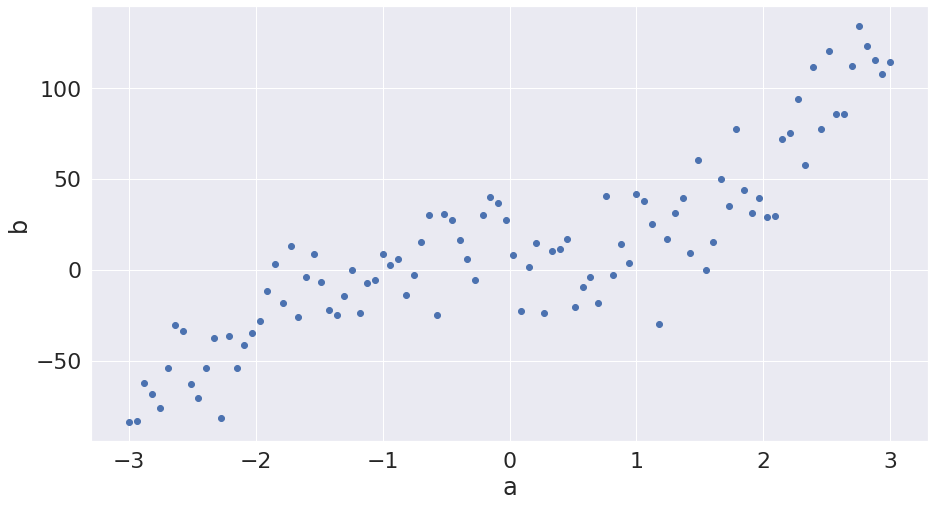

In [ ]:
# plot
plt.figure(figsize=(15, 8))
plt.scatter(a, b)
plt.xlabel('a')
plt.ylabel('b')


# Estimating the polynomial from data
1. build matrix A
    - column 0 is a to the 0th power
        - also known as: bias term
    - column 1 is a to the 1st power
    - column 2 is a to the 2nd power
2. estimate model coefficients $m = \begin{bmatrix} m_0 \\ m_1 \\ m_2 \\ \vdots \end{bmatrix}$
    - Remember our estimated polynomial is:
        $$b = m_0 + m_1 a + m_2 a^2 + m_3 a^3 + ... $$
3. using estimated model coefficients $m$, predict where $b$ "should" be for each $a$ value

In [ ]:
# 1. build design matrix A
A = np.vstack([a ** exp for exp in range(poly_order + 1)]).T
A

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.93939394e+00,  8.64003673e+00,
        -2.53964716e+01],
       [ 1.00000000e+00, -2.87878788e+00,  8.28741965e+00,
        -2.38577232e+01],
       [ 1.00000000e+00, -2.81818182e+00,  7.94214876e+00,
        -2.23824192e+01],
       [ 1.00000000e+00, -2.75757576e+00,  7.60422406e+00,
        -2.09692239e+01],
       [ 1.00000000e+00, -2.69696970e+00,  7.27364555e+00,
        -1.96168016e+01],
       [ 1.00000000e+00, -2.63636364e+00,  6.95041322e+00,
        -1.83238167e+01],
       [ 1.00000000e+00, -2.57575758e+00,  6.63452709e+00,
        -1.70889334e+01],
       [ 1.00000000e+00, -2.51515152e+00,  6.32598714e+00,
        -1.59108162e+01],
       [ 1.00000000e+00, -2.45454545e+00,  6.02479339e+00,
        -1.47881292e+01],
       [ 1.00000000e+00, -2.39393939e+00,  5.73094582e+00,
        -1.37195370e+01],
       [ 1.00000000e+00, -2.33333333e+00,  5.44444444e+00,
      

In [ ]:
# 2. compute model coefficients
m = np.linalg.inv(A.T @ A) @ A.T @ b
m

array([6.02256887, 4.80256052, 1.88890144, 3.57931664])

In [ ]:
a_100 = np.linspace(a[0], a[-1], 100)
A_100 = np.vstack([a_100 ** exp for exp in range(poly_order + 1)]).T

# 3. estimate b
b_estimate = A_100 @ m
b_estimate

array([-88.02654911, -82.6758841 , -77.5432111 , -72.62374933,
       -67.91271801, -63.40533633, -59.09682352, -54.98239879,
       -51.05728134, -47.3166904 , -43.75584516, -40.36996484,
       -37.15426865, -34.10397581, -31.21430553, -28.48047701,
       -25.89770947, -23.46122212, -21.16623417, -19.00796484,
       -16.98163332, -15.08245885, -13.30566062, -11.64645785,
       -10.10006975,  -8.66171553,  -7.3266144 ,  -6.08998558,
        -4.94704827,  -3.89302169,  -2.92312505,  -2.03257755,
        -1.21659842,  -0.47040686,   0.21077791,   0.83173669,
         1.39725026,   1.91209942,   2.38106494,   2.80892762,
         3.20046825,   3.56046762,   3.89370651,   4.20496571,
         4.49902601,   4.78066821,   5.05467308,   5.32582142,
         5.59889402,   5.87867166,   6.16993513,   6.47746523,
         6.80604273,   7.16044844,   7.54546313,   7.9658676 ,
         8.42644263,   8.93196901,   9.48722754,  10.09699899,
        10.76606417,  11.49920385,  12.30119883,  13.17

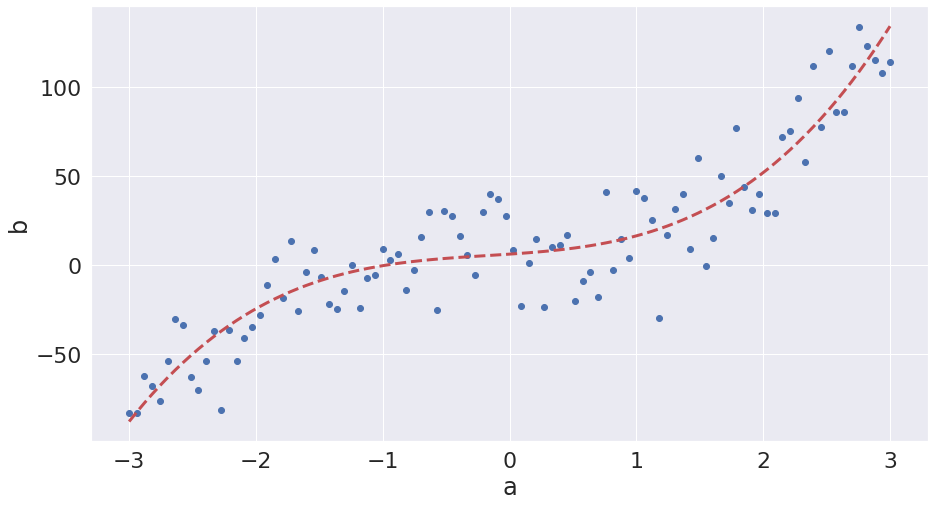

In [ ]:
# we've done all this hard work ... lets see some results!
plt.figure(figsize=(15, 8))
plt.scatter(a, b)
plt.plot(a_100, b_estimate, linewidth=3, color='r', linestyle='--')
plt.xlabel('a')
plt.ylabel('b');